In [2]:
import price_analysis_tools as pt

dataset_input = pt.historical_data('ESP')
coeff_dataframe= pt.coeff_reg_lin(dataset_input, months=[4, 5, 6, 7])
coeff_dataframe


In [3]:
dataset_input

,Coal,Gas,Other fossil,Hydro,Nuclear,Solar,Wind,Other renewables,Other,Gas_prices,Coal_prices,ETS,electricity_prices,imports,exports,demand
MTU,,,,,,,,,,,,,,,,
2021-01-01 00:00:00+00:00,261,4527.0,79.0,6180,7117.0,10.0,6879.0,13069,55.0,19.15,69.00,NaN,50.87,320,1731,24623
2021-01-01 01:00:00+00:00,261,4546.0,78.0,5768,7117.0,9.0,7001.0,12778,54.0,19.15,69.00,NaN,48.19,283,2573,23436
2021-01-01 02:00:00+00:00,260,4117.0,78.0,4712,7118.0,10.0,7256.0,11978,55.0,19.15,69.00,NaN,44.68,98,3176,21319
2021-01-01 03:00:00+00:00,259,3781.0,78.0,4630,7118.0,9.0,7951.0,12590,55.0,19.15,69.00,NaN,38.5,0,3544,19606
2021-01-01 04:00:00+00:00,259,3734.0,78.0,4709,7119.0,9.0,8791.0,13509,54.0,19.15,69.00,NaN,36.8,0,4246,18753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-26 11:00:00+00:00,1134,12049.0,190.0,1630,5945.0,7101.0,3047.0,11778,68.0,83.25,230.25,59.15,198.22,0,1948,30297
2021-10-26 12:00:00+00:00,1148,12171.0,190.0,1468,5945.0,7908.0,2922.0,12298,69.0,83.25,230.25,59.15,206.42,0,2295,30606
2021-10-26 13:00:00+00:00,1147,11832.0,187.0,1176,5945.0,8236.0,2662.0,12074,74.0,83.25,230.25,59.15,200.6,292,1965,30692


In [36]:
import matplotlib.pyplot as plt
from operator import index
import pandas as pd 
import numpy as np 
from sklearn import preprocessing, linear_model
from sklearn.metrics import mean_squared_error

bool_mask = []
months = [5,6,7,8, 9, 10]
for i in dataset_input.index.month:
    bool_mask.append(i in months)

x_df = dataset_input.loc[(dataset_input.index.hour==h) ]
x =np.array(x_df.drop(columns=['Coal_prices']))
std_scale = preprocessing.StandardScaler().fit(x)
x_scaled = std_scale.transform(x)
x_fin = pd.DataFrame(x_scaled, columns=x_df.drop(columns=[ 'Coal_prices']).columns)







(-2.0, 3.0)

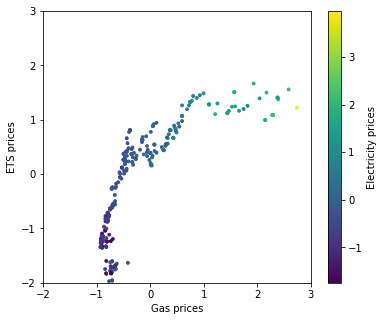

In [37]:
fig = plt.figure(figsize=(6, 5))

plt.scatter(x_fin['Gas_prices'], x_fin['ETS'], c=x_fin['electricity_prices'], s=8)

plt.xlabel("Gas prices")
plt.ylabel("ETS prices")
plt.colorbar(label='Electricity prices')
plt.xlim(-2,3)
plt.ylim(-2,3)